In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from mpl_axes_aligner import align
import newfig_utils as utils

In [2]:
plt.rcParams['axes.facecolor'] = '#EEEEEE'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 2.0

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

In [3]:
filename = 'data/forAbhi/Velocity_MeanSEM.mat'
data = scipy.io.loadmat(filename)
T4_arclight_gratings_mean = data['Arcmean'][:105,[16,17,18,19,40,41,42,43]] #taking PD(120deg) and ND(300deg) data
T4_arclight_gratings_sem = data['ArcSE'][:105,[16,17,18,19,40,41,42,43]] #taking PD(120deg) and ND(300deg) data

T4_gcamp_gratings_mean = data['Gmean'][:105,[16,17,18,19,40,41,42,43]] #taking PD(120deg) and ND(300deg) data
T4_gcamp_gratings_sem = data['GSE'][:105,[16,17,18,19,40,41,42,43]] #taking PD(120deg) and ND(300deg) data

In [4]:
filename = 'data/forAbhi/Edge_MeanSEM.mat'
data = scipy.io.loadmat(filename)
T4_arclight_edge_mean = data['Arcmean'][:105,[0,1,2,3,5,6,7,8]] #excluding 240 deg/sec data
T4_arclight_edge_sem = data['ArcSE'][:105,[0,1,2,3,5,6,7,8]] #excluding 240 deg/sec data

T4_gcamp_edge_mean = data['Gmean'][:105,[0,1,2,3,5,6,7,8]] #excluding 240 deg/sec data
T4_gcamp_edge_sem = data['GSE'][:105,[0,1,2,3,5,6,7,8]] #excluding 240 deg/sec data

In [5]:
#Reading arclight and gcamp gratings contrast and speed peak and dsi mean with sem data
filename = 'data/PeakandDSIwithSEMdata/Grating_MeanSEM.mat'
data = scipy.io.loadmat(filename)
gcamp_grating_speed_peakdsi = data['GCaGratingVelocity'] #it has 4 rows corresponding to 4 speeds. 6 columns corresponding to PDmean, PDerror, NDmean,NDerror,DSImean,DSIerror
gcamp_grating_contrast_peakdsi = data['GCaGratingContrast'][::-1,:] #reaaranging rows so that the contrast goes from 10% to 100%
arclight_grating_speed_peakdsi = data['ArcGratingVelocity']
arclight_grating_contrast_peakdsi = data['ArcGratingContrast'][::-1,:]

In [6]:
#Reading arclight and gcamp edge contrast and speed peak and dsi mean with sem data
filename = 'data/PeakandDSIwithSEMdata/Edge_MeanSEM.mat'
data = scipy.io.loadmat(filename)
gcamp_edge_speed_peakdsi = data['GCaEdgeVelocity'] #it has 4 rows corresponding to 4 speeds. 6 columns corresponding to PDmean, PDerror, NDmean,NDerror,DSImean,DSIerror
gcamp_edge_contrast_peakdsi = data['GCaEdgeContrast'][::-1,:]
arclight_edge_speed_peakdsi = data['ArcEdgeVelocity']
arclight_edge_contrast_peakdsi = data['ArcEdgeContrast'][::-1,:]

In [7]:
T4Ca_model = np.load('data/modeldata/T4Ca_model.npy')
T4Ca_model = T4Ca_model[:105,:]/100.0
T4Ca_model_sem = np.zeros_like(T4Ca_model)
T4Ca_model.shape #columns : velocity 48, contrast 48, Edge velocity 8, Edge contrast 8

(105, 112)

In [8]:
#getting model peak values
model_grating_speed_peakdsi = np.zeros_like(gcamp_grating_speed_peakdsi)
model_grating_speed_peakdsi[:,0] = T4Ca_model[:,[16,17,18,19,40,41,42,43]].max(axis=0)[:4]
model_grating_speed_peakdsi[:,2] = T4Ca_model[:,[16,17,18,19,40,41,42,43]].max(axis=0)[4:]

model_edge_speed_peakdsi = np.zeros_like(gcamp_edge_speed_peakdsi)
model_edge_speed_peakdsi[:,0] = T4Ca_model[:,96:104].max(axis=0)[:4]
model_edge_speed_peakdsi[:,2] = T4Ca_model[:,96:104].max(axis=0)[4:]

In [9]:
#for 4 speed, 12 directions
filename = 'data/forAbhi/Velocity_MeanSEM.mat'
data = scipy.io.loadmat(filename)
T4_arclight_mean = data['Arcmean'][5:110,:]
T4_arclight_sem = data['ArcSE'][5:110,:]

T4_gcamp_mean = data['Gmean'][5:110,:]
T4_gcamp_sem = data['GSE'][5:110,:]

filename = 'data/forAbhi/Contrast_MeanSEM.mat'
data = scipy.io.loadmat(filename)
T4_arclight_contrast_mean = data['Arcmean'][5:110,:]
T4_arclight_contrast_sem = data['ArcSE'][5:110,:]

T4_gcamp_contrast_mean = data['Gmean'][5:110,:]
T4_gcamp_contrast_sem = data['GSE'][5:110,:]

In [10]:
#Reading Ldir mean with sem values
filename = 'data/PeakandDSIwithSEMdata/LDirValues.mat'
data = scipy.io.loadmat(filename) # Arc-Velocity,SEM,Arc-Contrast ,SEM,GCaMP-Velocity,SEM,GCaMP-Contrast,SEM
gcamp_grating_speed_ldir = data['LDirValues'][:,[4,5]] #first column is for mean, second for sem
arclight_grating_speed_ldir = data['LDirValues'][:,[0,1]]
gcamp_grating_contrast_ldir = data['LDirValues'][:,[6,7]][::-1] #rows are reveresed to go from 10% to 100% contrast
arclight_grating_contrast_ldir = data['LDirValues'][:,[2,3]][::-1]

In [11]:
data_list = [T4_gcamp_mean, T4Ca_model[:,0:48]]
sem_list = [T4_gcamp_sem, T4Ca_model_sem[:,0:48]]
speed = [15,30,60,120]
peak_tuning, peak_tuning_sem = utils.calc_peaktuning(data_list, sem_list, speed, contrast=False)
axis_title = ['15 deg/s', '30 deg/s', '60 deg/s', '120 deg/s']
#plot_polars(peak_tuning, peak_tuning_sem,0.85,axis_title)
    
Ldir = utils.calc_Ldir(peak_tuning)
Ldir_speed_mag = Ldir[:,:,1]
    
    
data_list = [T4_gcamp_contrast_mean, T4Ca_model[:,48:96]]
sem_list = [T4_gcamp_contrast_sem, T4Ca_model_sem[:,48:96]]
contrast = [10,20,50,100]
peak_tuning, peak_tuning_sem = utils.calc_peaktuning(data_list, sem_list, speed=contrast, contrast=True)
axis_title = ['10%', '20%', '50%', '100%']
#plot_polars(peak_tuning, peak_tuning_sem,0.50, axis_title)
    
Ldir = utils.calc_Ldir(peak_tuning)
Ldir_contrast_mag = Ldir[:,:,1]

In [12]:
#getting model Ldir values
model_grating_speed_ldir = np.zeros_like(gcamp_grating_speed_ldir)
model_grating_speed_ldir[:,0] = Ldir_speed_mag[1,:]

model_grating_contrast_ldir = np.zeros_like(gcamp_grating_contrast_ldir)
model_grating_contrast_ldir[:,0] = Ldir_contrast_mag[1,:]

In [13]:
model_grating_speed_ldir, model_grating_contrast_ldir

(array([[0.47999176, 0.        ],
        [0.49456048, 0.        ],
        [0.32735002, 0.        ],
        [0.34436685, 0.        ]]),
 array([[0.38402941, 0.        ],
        [0.46194865, 0.        ],
        [0.46653913, 0.        ],
        [0.51302558, 0.        ]]))

In [14]:
Ldir_speed_mag[1,:]

array([0.47999176, 0.49456048, 0.32735002, 0.34436685])

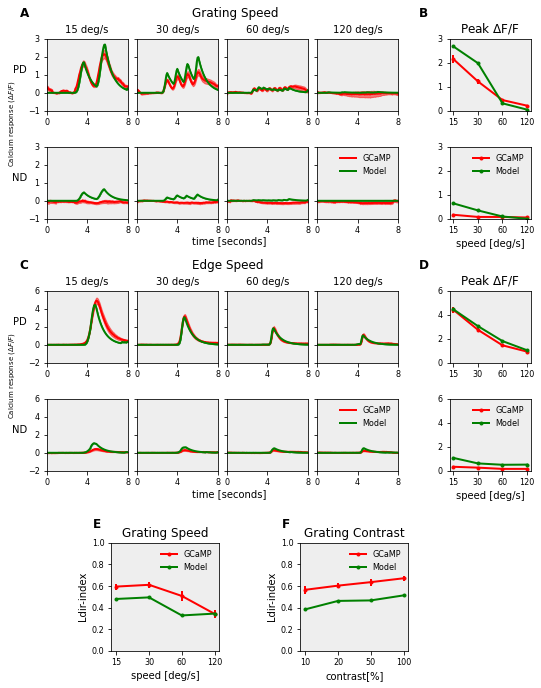

In [15]:
def plot_fig5():
    
    f = plt.figure(figsize=(7.5,10))
    
    axis_title = ['15 deg/s', '30 deg/s', '60 deg/s', '120 deg/s']
    xlabel = 'speed [deg/s]'
    speed = [15,30,60,120]
    utils.plot_newmodelsignals([T4_gcamp_gratings_mean, T4Ca_model[:,[16,17,18,19,40,41,42,43]]],
                 [T4_gcamp_gratings_sem, T4Ca_model_sem[:,[16,17,18,19,40,41,42,43]]],
                            [gcamp_grating_speed_peakdsi, model_grating_speed_peakdsi],
                            (-1.0,3.00),0.85, axis_title,xlabel,xticklabel=speed,c=['r','g'],legend=['GCaMP','Model'])
    utils.plot_newmodelsignals([T4_gcamp_edge_mean, T4Ca_model[:,96:104]],
                 [T4_gcamp_edge_sem, T4Ca_model_sem[:,96:104]], 
                               [gcamp_edge_speed_peakdsi, model_edge_speed_peakdsi],
                               (-2.0,6.00),0.50, axis_title,xlabel,xticklabel=speed,c=['r','g'],legend=['GCaMP','Model'])
    
#     data_list = [T4_gcamp_mean, T4Ca_model[:,0:48]]
#     sem_list = [T4_gcamp_sem, T4Ca_model_sem[:,0:48]]
#     speed = [15,30,60,120]
#     peak_tuning, peak_tuning_sem = utils.calc_peaktuning(data_list, sem_list, speed, contrast=False)
#     axis_title = ['15 deg/s', '30 deg/s', '60 deg/s', '120 deg/s']
#     #plot_polars(peak_tuning, peak_tuning_sem,0.85,axis_title)
    
#     Ldir = utils.calc_Ldir(peak_tuning)
#     Ldir_speed_mag = Ldir[:,:,1]
    
    
#     data_list = [T4_gcamp_contrast_mean, T4Ca_model[:,48:96]]
#     sem_list = [T4_gcamp_contrast_sem, T4Ca_model_sem[:,48:96]]
    contrast = [10,20,50,100]
#     peak_tuning, peak_tuning_sem = utils.calc_peaktuning(data_list, sem_list, speed=contrast, contrast=True)
#     axis_title = ['10%', '20%', '50%', '100%']
#     #plot_polars(peak_tuning, peak_tuning_sem,0.50, axis_title)
    
#     Ldir = utils.calc_Ldir(peak_tuning)
#     Ldir_contrast_mag = Ldir[:,:,1]
    
    xticklabel=[speed,contrast]
    
    #Ldir_mag = [Ldir_speed_mag, Ldir_contrast_mag]
    utils.plot_Ldir([gcamp_grating_speed_ldir, model_grating_speed_ldir,
                    gcamp_grating_contrast_ldir, model_grating_contrast_ldir],'contrast [%]',['r','g'],['GCaMP','Model'],xticklabel)
    
#     data = [[T4_gcamp_gratings_mean, T4Ca_model[:,[16,17,18,19,40,41,42,43]]], [T4_gcamp_edge_mean, T4Ca_model[:,96:104]]]
#     utils.plot_DSI(data, 'speed [deg/s]',xticklabel)
    
    
    
    
    f.text(0.35,0.98,'Grating Speed',fontsize=12)
    f.text(0.35,0.63,'Edge Speed',fontsize=12)
    f.text(0.35,0.665,'time [seconds]')
    f.text(0.35,0.313,'time [seconds]')
    f.text(0.03,0.98,'A',weight='bold',fontsize=12)
    f.text(0.77,0.98,'B',weight='bold',fontsize=12)
    f.text(0.03,0.63,'C',weight='bold',fontsize=12)
    f.text(0.77,0.63,'D',weight='bold',fontsize=12)
    f.text(0.165,0.27,'E',weight='bold',fontsize=12)
    f.text(0.515,0.27,'F',weight='bold',fontsize=12)
    f.text(0.007, 0.832, r'Calcium response $(\Delta F/F)$', fontsize=7, va='center', rotation='vertical')
    #f.text(0.76, 0.832, r'Calcium response $(\Delta F/F)$', color='red',fontsize=7, va='center', rotation='vertical')
    f.text(0.007, 0.482, r'Calcium response $(\Delta F/F)$', fontsize=7, va='center', rotation='vertical')
    #f.text(0.76, 0.482, r'Calcium response $(\Delta F/F)$', color='red',fontsize=7, va='center', rotation='vertical')
    
    
    plt.savefig('figures/new_figures/figure5.pdf',dpi=1000)
    
plot_fig5()

In [84]:
x_values = np.arange(105)*(1/13.0)

In [85]:
x_values

array([0.        , 0.07692308, 0.15384615, 0.23076923, 0.30769231,
       0.38461538, 0.46153846, 0.53846154, 0.61538462, 0.69230769,
       0.76923077, 0.84615385, 0.92307692, 1.        , 1.07692308,
       1.15384615, 1.23076923, 1.30769231, 1.38461538, 1.46153846,
       1.53846154, 1.61538462, 1.69230769, 1.76923077, 1.84615385,
       1.92307692, 2.        , 2.07692308, 2.15384615, 2.23076923,
       2.30769231, 2.38461538, 2.46153846, 2.53846154, 2.61538462,
       2.69230769, 2.76923077, 2.84615385, 2.92307692, 3.        ,
       3.07692308, 3.15384615, 3.23076923, 3.30769231, 3.38461538,
       3.46153846, 3.53846154, 3.61538462, 3.69230769, 3.76923077,
       3.84615385, 3.92307692, 4.        , 4.07692308, 4.15384615,
       4.23076923, 4.30769231, 4.38461538, 4.46153846, 4.53846154,
       4.61538462, 4.69230769, 4.76923077, 4.84615385, 4.92307692,
       5.        , 5.07692308, 5.15384615, 5.23076923, 5.30769231,
       5.38461538, 5.46153846, 5.53846154, 5.61538462, 5.69230